# Extraction and creation of the pandas dataset

We begin to extract the two files and join them to get our Dataframe

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
from itertools import product
from collections import defaultdict

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
!spacy download en_core_web_sm -q
import en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
# The news.tsv file contains the detailed information of news articles involved in the behaviors.tsv file.
# It has 7 columns, which are divided by the tab symbol:
# - News ID
# - Category
# - Subcategory
# - Title
# - Abstract
# - URL
# - Title Entities (entities contained in the title of this news)
# - Abstract Entities (entities contained in the abstract of this news)
file_news = pd.read_table('../Dataset/MIND-dataset/MINDsmall_train/news.tsv',
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])
file_news['nid']=file_news['url'].str[-12:-5]

In [26]:
json_news = pd.read_json('../Dataset/MIND-dataset/MINDsmall_train/msn-article_content.json')
json_news['text'] = [' '.join(x) for x in json_news['body']]
json_news = json_news.drop(['body'], axis=1)

In [27]:
print(json_news.shape)
print(file_news.shape)

(51282, 2)
(51282, 9)


In [28]:
raw_data = file_news.merge(json_news, on = 'nid').drop(['title_entities', 'abstract_entities', 'url', 'abstract'], axis=1)
raw_data.head()

,id,category,subcategory,title,nid,text
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...",AAGH0ET,The royals are free to shop wherever they cho...
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,AAB19MK,"When you first start dieting and exercising, t..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,AAJgNsz,"ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked o..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,AACk2N6,I had to be perfect. In order to s...
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...",AAAKEkt,"As you get older, little growths called skin t..."


In [29]:
raw_data.shape

(51278, 6)

# DATA EXPLORATION

In [30]:
df = raw_data.copy() # We create a dataframe df
#df = raw_data.sample(1000).copy() #sample for testing
df = df[df['text'].str.len()<20000].reset_index() #We remove the texts too long
df = df[df['text'].str.len()>30].reset_index() #We remove the texts too short
df = df.drop_duplicates(['text'])

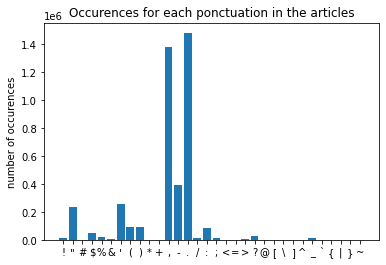

In [31]:
ponctuations = {x : 0 for x in string.punctuation}
for ponc,text in product(string.punctuation, df['text']):
  ponctuations[ponc] += text.count(ponc) 
x,y=zip(*ponctuations.items())
plt.figure()
plt.ylabel("number of occurences")
plt.title("Occurences for each ponctuation in the articles")
plt.bar(x,y)
plt.show()

In [32]:
df.describe(include = 'all')

,level_0,index,id,category,subcategory,title,nid,text
count,50004.000000,50004.000000,50004,50004,50004,50004,50004,50004
unique,NaN,NaN,50004,17,263,49602,50004,50004
top,NaN,NaN,N61992,news,newsus,Photos of the Day,BBWu8ir,The Raptors have ruled out guard and center/...
freq,NaN,NaN,1,15542,6457,15,1,1
mean,25344.708983,25616.483881,NaN,NaN,NaN,NaN,NaN,NaN
std,14653.146121,14776.081547,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,12652.750000,12817.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,25323.500000,25577.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,38002.250000,38408.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.isnull().value_counts()

level_0  index  id     category  subcategory  title  nid    text 
False    False  False  False     False        False  False  False    50004
dtype: int64

We do not have missing values

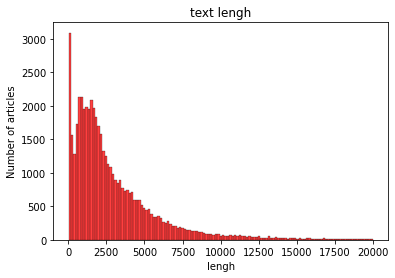

In [34]:
plt.figure()
ax = sns.histplot(df.text.str.len(),color='red')
ax.set (ylabel="Number of articles", 
        title ="text lengh", 
        xlabel = "lengh")
plt.show();

In [35]:
df[df['text'].str.len()<100] #We remove the texts too long

,level_0,index,id,category,subcategory,title,nid,text
143,143,153,N14176,foodanddrink,videos,Blueberry Dump Cake Satisfies Every Sweet Tooth,AABRsV7,"Dump cakes are the perfect, easy summer desser..."
152,152,162,N16430,video,animals,This Rare Albino Hedgehog Was Rescued In Calif...,AAHZ3Ph,This hedgehog was rescued in California.
273,274,288,N60467,video,animals,Puppy adorably escapes pen to join doggy friends,AAJgR3m,Watch this puppy make a hilarious escape from ...
354,358,376,N10220,video,viral,Boy With No Legs Goes Viral After Video of Him...,AAHtM4V,This 10-year old is fearless. Buzz60’s Tony Sp...
386,391,409,N48320,sports,football_nfl_videos,Denver Broncos quarterback Joe Flacco voices f...,AAJrGQp,Denver Broncos quarterback Joe Flacco voices f...
...,...,...,...,...,...,...,...,...
50477,50732,51174,N4908,lifestyle,lifestylefamily,Family of 100-year-old veteran never knew he w...,BBWyyCy,\r\nFamily of 100-year-old veteran never knew ...
50478,50733,51175,N45120,video,news,New worries for American held in Lebanon,BBWyyDx,\r\nThe plea to Pres. Trump from Amer Fakhoury...
50500,50755,51197,N33626,sports,football_nfl_videos,Ravens crush Bengals,BBWyyqH,\r\nWatch the highlights from the Week 10 matc...
50513,50768,51210,N32024,sports,football_nfl_videos,Dolphins force turnovers to beat Colts,BBWyzGK,\r\nWatch highlights from the Week 10 game bet...


# Data cleaning

We create the function to clean the dataset and apply it to the articles

In [36]:

def clean (article):

  # Deletes urls
  article = re.sub(r"https:[A-Za-z0-9]+", "", article)
  article = re.sub(r"http:[A-Za-z0-9]+", "", article)
  article = re.sub(r"www\.[A-Za-z0-9]+", "", article)
  
  # We force the utf-8 encoding
  article.encode("utf-8").decode("utf-8")
  
  # We delete the \r and the \n
  article = re.sub(r"\\r|\\n", "", article)
  
  #We delete the 's
  article = re.sub(r"'s", "", article)
  
  # We delete everything that is not alphabetic
  pattern = re.compile(r'[^a-zA-Z]+')
  article = pattern.sub(' ', article)
  
  # Transform multiples spaces in one space
  article = re.sub(r"\s{2,}", " ", article)

  # strip 
  article = article.strip()

  return article

In [37]:
df['text_cleaned'] = df['text'].apply(lambda s : clean(s))

We vizualize the lengh of the articles, first for all the articles then for the little articles

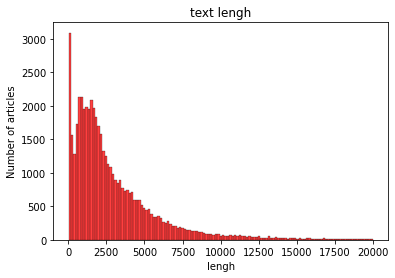

In [38]:
plt.figure()
ax = sns.histplot(df.text.str.len(),color='red')
ax.set (ylabel="Number of articles", 
        title ="text ltengh", 
        xlabel = "tlengh")
plt.show();

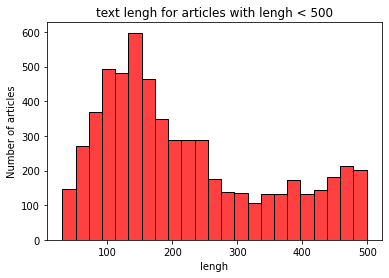

In [39]:
plt.figure()
ax = sns.histplot(df[df.text.str.len()<500].text.str.len(),color='red')
ax.set (ylabel="Number of articles", 
        title ="text lengh for articles with lengh < 500", 
        xlabel = "lengh")
plt.show();

Let's vizualize the stop words in our dataset

<BarContainer object of 15 artists>

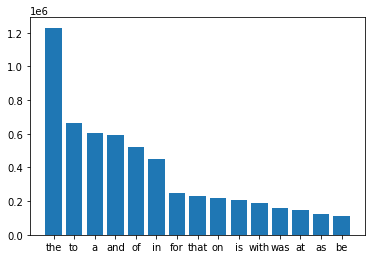

In [40]:
all_articles = df.text.str.cat(sep=' ').split()
dic=defaultdict(int)
for word in all_articles:
    if word in STOP_WORDS:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15]
x,y=zip(*top)
plt.bar(x,y)

# Lemmatatization

In [41]:
df.head()

,level_0,index,id,category,subcategory,title,nid,text,text_cleaned
0,0,0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...",AAGH0ET,The royals are free to shop wherever they cho...,The royals are free to shop wherever they choo...
1,1,2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,AAJgNsz,"ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked o...",ZOLOTE Ukraine Lt Ivan Molchanets peeked over ...
2,2,3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,AACk2N6,I had to be perfect. In order to s...,I had to be perfect In order to shed my perfec...
3,3,4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...",AAAKEkt,"As you get older, little growths called skin t...",As you get older little growths called skin ta...
4,4,5,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,AAJ4lap,The officiating in the Packers' 23-22 Monday n...,The officiating in the Packers Monday night wi...


We use a di to replace common words with our empirical observations

In [42]:
to_replace={
    'sen':'senate',
    'senator':'senate',
    'teacher':'teaching'
}

We remove Stop Words, with empirical observations with LDA model, LSA model and Bert wortds extractions, we complete the stop_words list 

In [43]:
add_stop_words={'tonight',
                'yes',
                'no',
                'hey',
                'okay',
                'etc',
                'mr',
                'mss',
                'ms',
                'er',
                'v',
                'monthly',
                'tb',
                'sec',
                'mind'}
STOP_WORDS |= add_stop_words

In [44]:
# remove stop-words, very long, 3 000 seconds for the small dataset
# We remove also every word which is not noun or adjective
nlp = en_core_web_sm.load()
excluded_tags = {"ADV", "ADP", "AUX", "NUM"}
df['text_tokenized'] = df['text_cleaned'].apply(lambda x: [token.lemma_ for token in nlp(x) if (token.pos_ not in excluded_tags) & (token.lemma_.lower() not in STOP_WORDS) & (token.text.lower() not in STOP_WORDS) & (len(token.lemma_) >1)])
df['nlp_ready'] = df['text_tokenized'].str.join(' ').str.lower()
df = df.drop(['text_tokenized', 'level_0', "index"], axis=1)
df.head()
df = df.dropna()
df.to_csv('smallMind_clean_data_without_stop_words.csv', index=False)


In [45]:
df.head()

,id,category,subcategory,title,nid,text,text_cleaned,nlp_ready
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...",AAGH0ET,The royals are free to shop wherever they cho...,The royals are free to shop wherever they choo...,royal free shop choose tend family royal warra...
1,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,AAJgNsz,"ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked o...",ZOLOTE Ukraine Lt Ivan Molchanets peeked over ...,zolote ukraine lt ivan molchanets peek parapet...
2,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,AACk2N6,I had to be perfect. In order to s...,I had to be perfect In order to shed my perfec...,perfect order shed perfectionism know major li...
3,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...",AAAKEkt,"As you get older, little growths called skin t...",As you get older little growths called skin ta...,old little growth skin tag start pop body reco...
4,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,AAJ4lap,The officiating in the Packers' 23-22 Monday n...,The officiating in the Packers Monday night wi...,officiating packers monday night win lions egr...


In [46]:
df.isnull().value_counts()

id     category  subcategory  title  nid    text   text_cleaned  nlp_ready
False  False     False        False  False  False  False         False        50004
dtype: int64